# Customer Service Request Analysis
Prepaired by- **Pratap Kumar Nayak**

This dataset contains information about the complaints made to the NYPD from 2010 until the present. Obtained from: [Here](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present)

In [1]:
import os
os.getcwd()

'C:\\Users\\PKN\\Data_Science\\DS_w_Python\\Final Projects'

## Data Aquisition

In [2]:
# library for data aquisition

import pandas as pd

In [3]:
# loading the dataset

rd = pd.read_csv(r'C:\Users\PKN\Data_Science\DS_w_Python\Final Projects\Project_NYC311_Datasets\NYC311.csv')

C:\Users\PKN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploratory Data Analysis (EDA) 

In [4]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
# droping all null columns

mrd = rd.drop(["Garage Lot Name","Taxi Pick Up Location","Taxi Company Borough","Vehicle Type","School or Citywide Complaint"],axis=1)

In [6]:
mrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
mrd.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
ctc = pd.DataFrame({'count':mrd.groupby(['Complaint Type','City']).size()}).reset_index()
ctc

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,38
1,Animal Abuse,ASTORIA,125
2,Animal Abuse,BAYSIDE,37
3,Animal Abuse,BELLEROSE,7
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
759,Vending,STATEN ISLAND,25
760,Vending,SUNNYSIDE,15
761,Vending,WHITESTONE,1
762,Vending,WOODHAVEN,6


In [9]:
# libraries for ploting

import matplotlib.pyplot as plt
%matplotlib inline

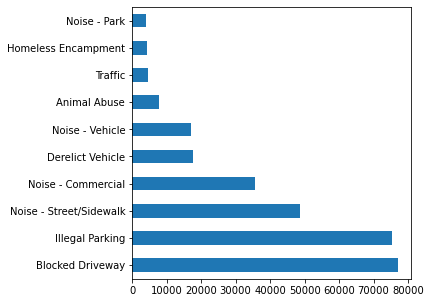

In [10]:
mrd['Complaint Type'].value_counts().head(10).plot(kind='barh',figsize=(5,5));

In [11]:
mc = mrd.dropna(subset=['Complaint Type'])
mc = mrd.groupby('Complaint Type')

sortedComplaintType = mc.size().sort_values(ascending = False)
sortedComplaintType = sortedComplaintType.to_frame('count').reset_index()
sortedComplaintType
sortedComplaintType.head()

,Complaint Type,count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718


<function matplotlib.pyplot.show(close=None, block=None)>

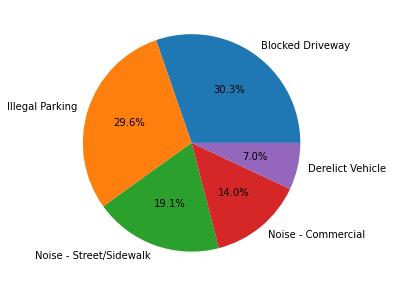

In [12]:
sortedComplaintType = sortedComplaintType.head()
plt.figure(figsize=(5,5))
plt.pie(sortedComplaintType['count'],labels=sortedComplaintType["Complaint Type"], autopct="%1.1f%%")
plt.show

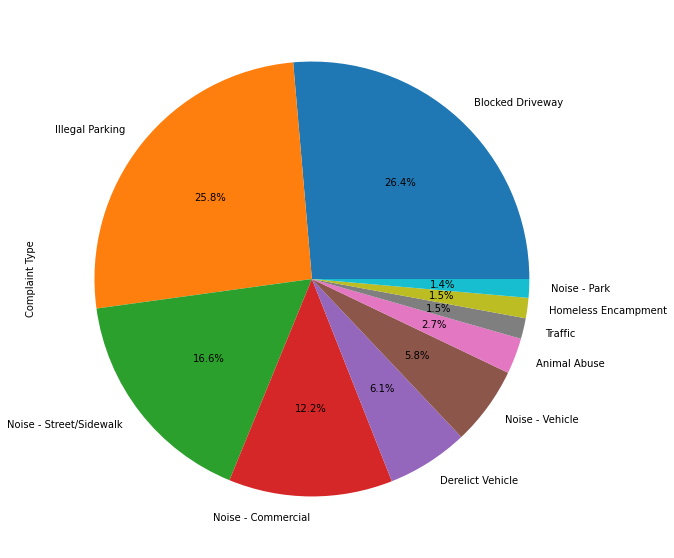

In [13]:
mrd['Complaint Type'].value_counts().head(10).plot(kind='pie',figsize=(10,10),autopct="%1.1f%%");

In [14]:
# which Borough has the maximum number of noise complaints?
# which Borough complains more about noise?

In [15]:
mrd[mrd['Complaint Type'].apply(lambda x: x.split(' ')[0]== 'Noise')]['Borough'].value_counts()

MANHATTAN        42000
BROOKLYN         31890
BRONX            15347
QUEENS           14032
STATEN ISLAND     1939
Unspecified       1037
Name: Borough, dtype: int64

In [16]:
noise = mrd['Complaint Type'] == 'Noise - Commercial'
noise_complaints = mrd[noise]
noise_complaints['Borough'].value_counts()
mrd[(mrd['Complaint Type'] == 'Noise - Commercial')]['Borough'].value_counts()

MANHATTAN        14560
BROOKLYN         11463
QUEENS            6075
BRONX             2434
STATEN ISLAND      679
Unspecified        366
Name: Borough, dtype: int64

In [17]:
noise_complaints_counts = noise_complaints['Borough'].value_counts()
complaints_counts = mrd['Borough'].value_counts()

<AxesSubplot:>

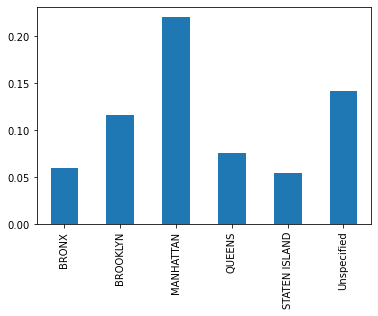

In [18]:
(noise_complaints_counts/complaints_counts.astype(float)).plot(kind='bar')

<AxesSubplot:ylabel='Borough'>

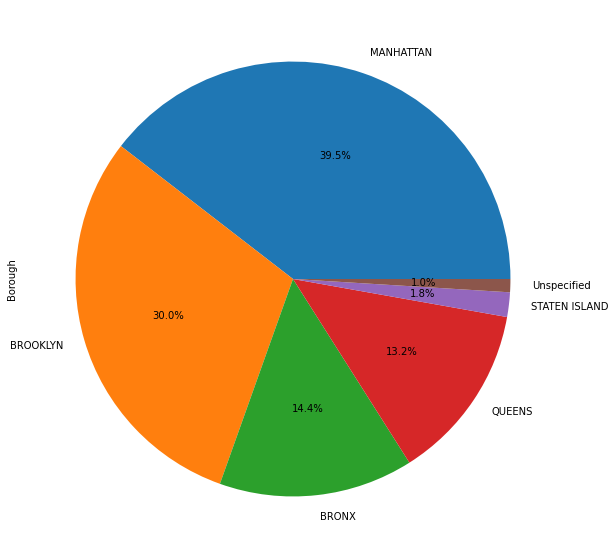

In [19]:
total = mrd[mrd['Complaint Type'].apply(lambda x: x.split(' ')[0]== 'Noise')]['Borough'].value_counts().sum()
(mrd[mrd['Complaint Type'].apply(lambda x: x.split(' ')[0]== 'Noise')]['Borough'].value_counts()/total).\
plot(kind='pie',figsize=(10,10),autopct="%1.1f%%")